# Baseball Database
## James Tench
## Udacity Data Analyst Nanodegree


### Project Overview
Conduct data analysis of your choice from a given dataset. Create a file that documents findings.


### Project Details

For this project I decided to analyze the Lahman baseball data set. This data set is a collection of baseball statistics from 1871 through current. It contains information about players, teams, and other statistics. 

After reviewing what information was in all of the files, here are questions I would like to attempt to answer

1. Do teams that pay out more per player in salaries tend to win more games?
2. How do the number of strike outs correlate with the number of games won?
3. Does a better defense or better offense result in more wins? For better offense we will use runs scored. For better defense we will use the earned runs allowed.

In [178]:
import numpy as np
import pandas as pd
import seaborn as sns

In [179]:
def corrected_standard_err(x):
    return (x - x.mean()) / x.std(ddof=0)

In [180]:
def correlation(x, y):
    # correlation = average of (x in standard units) times (y in standard units)
    std_x = corrected_standard_err(x)
    std_y = corrected_standard_err(y)
    
    return (std_x * std_y).mean()

In [181]:
# Master data csv file contains detailed information about players.
# Each player has a unique playerID. It does not look like this table will
# help with the analysis questions, however it is interesting to review facts
# about players and might be needed.
master_df = pd.read_csv('baseballdatabank-master/core/Master.csv')

In [182]:
# Uncomment to see the first few records
#master_df.head()

In [183]:
# Teams.csv contains team level stats
# This table will be useful in answering the question about the correlation between
# losses and errors. In addition, winning statistics can be combined with the Salaries.csv
# table to answer questions about the salaries
teams_df = pd.read_csv('baseballdatabank-master/core/Teams.csv')

In [184]:
# Uncomment to see the first few records
#teams_df.head()

In [265]:
#wins_and_losses_df = teams_df[['yearID', 'teamID', 'W', 'L']]
#wins_and_losses_df['winPercent'] = wins_and_losses_df['W'] / (wins_and_losses_df['W'] + wins_and_losses_df['L'])

/Users/jamestench/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [185]:
# Salaries.csv shows the player's salary, year and team they were associated with
# Although the Master.csv file has data back to 1871, this file only goes back to 1985
# so salary analysis should be restricted to that time frame
salary_df = pd.read_csv('baseballdatabank-master/core/Salaries.csv')

In [186]:
teams_since_salary_tracking_df = teams_df[teams_df['yearID'] > 1984]

In [187]:
# Uncomment to see the first few records
#teams_since_salary_tracking_df.head()

In [188]:
year_team_wins_df = teams_since_salary_tracking_df[['yearID', 'teamID', 'W']]

In [189]:
# get the mean salary for each team per year
# taking the mean vs total sum to account for team have more or less players
# included in their total salary number
yearly_team_salary_df = salary_df.groupby(['yearID', 'teamID'], as_index=False).mean()

In [190]:
yearly_team_salary_df.head()

,yearID,teamID,salary
0,1985,ATL,673045
1,1985,BAL,525486
2,1985,BOS,435902
3,1985,CAL,515281
4,1985,CHA,468865


In [191]:
# merge the records into one data frame
salary_wins_combined_df = yearly_team_salary_df.merge(year_team_wins_df, on=['yearID', 'teamID'])

In [192]:
salaries = salary_wins_combined_df['salary']
wins = salary_wins_combined_df['W']

In [193]:
print correlation(wins, salaries)

0.252420283143


In [194]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


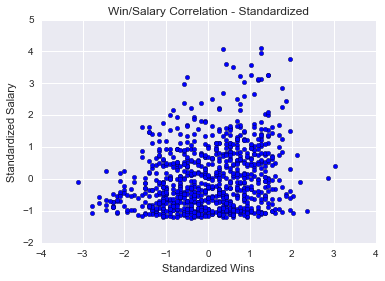

In [195]:
standardized_salaries = corrected_standard_err(salaries)
standardized_wins = corrected_standard_err(wins)
plt.scatter(standardized_wins, standardized_salaries)
plt.title("Win/Salary Correlation - Standardized")
plt.xlabel("Standardized Wins")
plt.ylabel("Standardized Salary")

### Findings - Do higher average salaries correlate to more winning games?
Based on the computed correlation we can see that there appears to be a small positive correlation between average salaries and the number of wins in a season. Although the relationship is positive it appears to be to small to consider this as a strong relationship. The scatter plot and the standarized scatter plot also support this visually because they do not show strong correlations, linear or otherwise.

In [196]:
# Answer the next question. Do the number of strike outs correlate the the number of games won?
# The Teams.csv file has a number of fields that are empty for strikeouts, or set to 0
# I am excluding those from the calculation as there appears to be some error, or missing information
# for those records.

teams_with_strikeouts_recorded_df = teams_df[teams_df['SO'] > 0]

In [197]:
strikeouts = teams_with_strikeouts_recorded_df['SO']
wins = teams_with_strikeouts_recorded_df['W']

In [198]:
print correlation(wins, strikeouts)

0.387457403239


In [199]:
strikeouts.describe()

count    2663.000000
mean      744.045437
std       292.137117
min         3.000000
25%       511.000000
50%       761.000000
75%       972.000000
max      1535.000000
Name: SO, dtype: float64

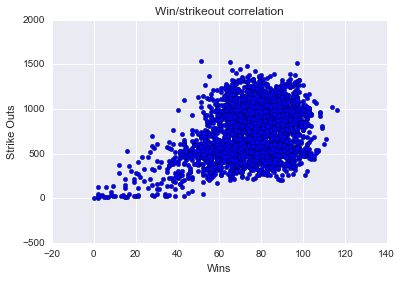

In [200]:
plt.scatter(wins, strikeouts)
plt.title("Win/strikeout correlation")
plt.xlabel("Wins")
plt.ylabel("Strike Outs")

### Findings - Do more strikeouts result in less wins?
Strike outs appear to have greater impact on wins compared to salaries. This result is actually contrary to what I would have guessed. I would have assumed that teams with more strikeouts are hitting the ball less on average which in turn would result in less runs being scored overall which one would think would result in less overall wins.

Although a correlation of 0.38 is higher than 0.25 reported by salaries, this is still considered a week correlation and would suggest that other variables are contributing to the number of wins

In [211]:
# Question three data. do better offensive stats, or defensive stats correlate to more wins?
wins = teams_df['W']
runs = teams_df['R']
earned_runs_allowed = teams_df['ER']

In [202]:
print correlation(wins, runs)

0.677242875886


In [212]:
print correlation(wins, earned_runs_allowed)

0.235720898903


In [213]:
runs.describe()

count    2805.000000
mean      681.945811
std       135.738244
min        24.000000
25%       613.000000
50%       690.000000
75%       763.000000
max      1220.000000
Name: R, dtype: float64

In [214]:
earned_runs_allowed.describe()

count    2805.000000
mean      570.895187
std       146.958007
min        25.000000
25%       500.000000
50%       590.000000
75%       666.000000
max      1023.000000
Name: ER, dtype: float64

(array([  26.,   78.,   70.,  221.,  454.,  885.,  735.,  283.,   49.,    4.]),
 array([   25. ,   124.8,   224.6,   324.4,   424.2,   524. ,   623.8,
          723.6,   823.4,   923.2,  1023. ]),
 <a list of 10 Patch objects>)

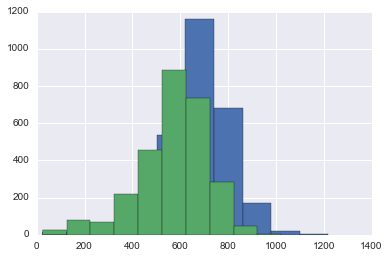

In [215]:
plt.hist(runs)
plt.hist(earned_runs_allowed)

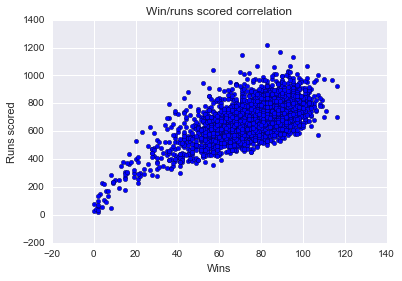

In [218]:
plt.scatter(wins, runs)
plt.title("Win/runs scored correlation")
plt.xlabel("Wins")
plt.ylabel("Runs scored")

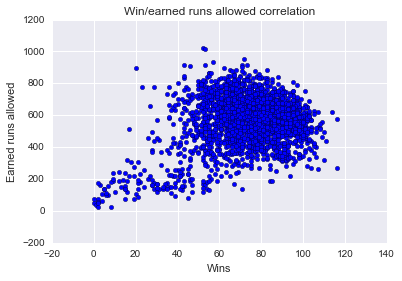

In [219]:
plt.scatter(wins, earned_runs_allowed)
plt.title("Win/earned runs allowed correlation")
plt.xlabel("Wins")
plt.ylabel("Earned runs allowed")

In [261]:
wins_and_losses_df = teams_df[['yearID', 'teamID', 'W', 'L']]
wins_and_losses_df['PERCENT'] = wins_and_losses_df['W'] / (wins_and_losses_df['W'] + wins_and_losses_df['L'])

/Users/jamestench/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [262]:
wins_and_losses_df

,yearID,teamID,W,L,PERCENT
0,1871,BS1,20,10,0.666667
1,1871,CH1,19,9,0.678571
2,1871,CL1,10,19,0.344828
3,1871,FW1,7,12,0.368421
4,1871,NY2,16,17,0.484848
5,1871,PH1,21,7,0.750000
6,1871,RC1,4,21,0.160000
7,1871,TRO,13,15,0.464286
8,1871,WS3,15,15,0.500000
9,1872,BL1,35,19,0.648148
